In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from proj1_helpers import *
from implementations import *
from plots import *
from utils import *
from validation import *
from preproccess_utils import *
import seaborn as sns
sns.set()
%load_ext autoreload
%autoreload 2

# Loading data, splitting into train and test splits and preprocess it:

In [2]:
DATA_TRAIN_PATH = 'data/train.csv'
labels, input_data, ids = load_csv_data(DATA_TRAIN_PATH)

#### Splitting data for the training and validation

In [3]:
seed = 46
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(input_data, labels, ratio=ratio, seed=seed)

#### Splitting into 4 groups and removing -999

In [4]:
x_trains, y_trains, del_columns, mean_of_all_col = preproccess(x_train, y_train)

these are the deleted columns:  {'0': [4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29], '1': [4, 5, 6, 12, 22, 26, 27, 28], '2': [22], '3': [22]}


#### Plotting correletion matrices for 4 groups

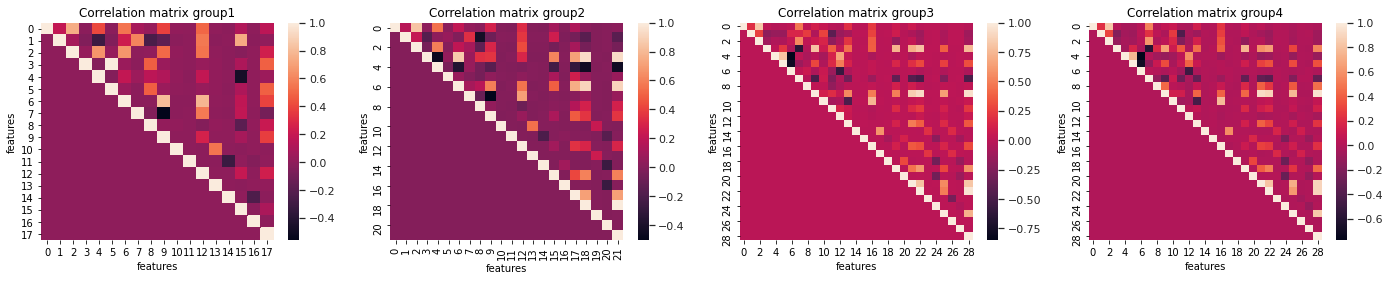

In [5]:
correlation_plot(x_trains)

#### Remove correlated columns

In [5]:
x_trains, del_columns_cor = correletions(x_trains)

these are the deleted columns:  {'0': [9, 5], '1': [21, 18, 6, 2], '2': [28, 22, 21, 9, 5, 2], '3': [28, 22, 21, 2]}


#### Remove outliers

In [6]:
x_trains, y_trains = remove_outliers(x_trains, y_trains)

#### Normalizing data

In [7]:
x_trains, y_trains, means, stds = normalization(x_trains, y_trains)

jet : 1, shape y : (78862,), shape x : (78862, 17)
jet : 2, shape y : (60674,), shape x : (60674, 19)
jet : 3, shape y : (39199,), shape x : (39199, 24)
jet : 4, shape y : (17122,), shape x : (17122, 26)


#### Applying all these changes to the test set

In [8]:
x_tests, y_tests = preproccess_test(x_test, y_test, del_columns, del_columns_cor, means, stds, mean_of_all_col)

# Running cross validation for all models, obtaining best hyper-parameters and best accuracy.

## 1. Least Squares GD

### Cross validation for the least squares GD

100%|██████████| 5/5 [02:15<00:00, 27.12s/it]


Accuracy is 0.7484


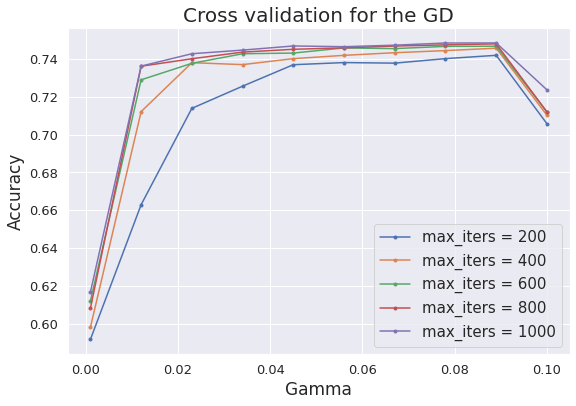

In [10]:
# parameters setting
type_ = 'GD'
bd_left = -3
bd_right = -1
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 10**bd_right, 10)
max_iters = np.arange(200, 1100, 200)
# cross validation
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**The best gamma = 0.09 and the best max_iter = 1000.  
We can see that there is no need to increase the max_iters parameter, because it doesn't bring accuracy improvements**

### Let's now apply best hyper-parameters to the model

In [11]:
max_iters = 1000
gamma = 0.09
y_preds = []
for i in range(4):
    np.random.seed(seed)
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = least_squares_GD(y_trains[i], x_trains[i], initial_w, max_iters, gamma, plot_loss = False)

    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)
    
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7432


**Best accuracy for Least squares GD is 0.7432**

## 2. Least Squares SGD

### Cross validation for least squares SGD

100%|██████████| 6/6 [03:26<00:00, 34.42s/it]


Accuracy is 0.7408


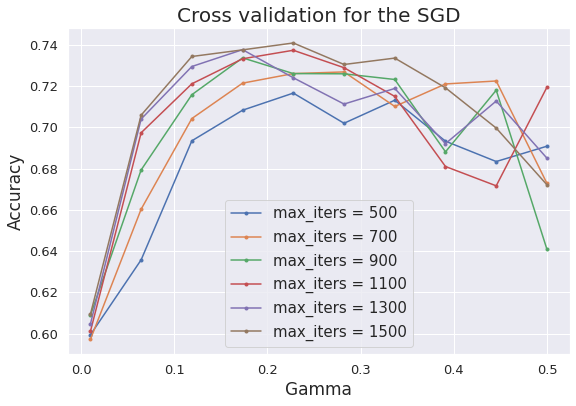

In [12]:
# parameters setting
type_ ='SGD'
bd_left = -2
bd_right = -1
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 5*10**bd_right, 10)
max_iters = np.arange(500, 1600, 200)
# cross validation
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**The best gamma = 0.2 and the best max_iter = 1500.  
We can see that there is no need to increase the max_iters parameter, because it doesn't bring accuracy improvements**

### Let's now apply best hyper-parameters to the model

In [13]:
max_iters = 1500
gamma = 0.2
y_preds = []
for i in range(4):
    np.random.seed(seed)
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = least_squares_SGD(y_trains[i], x_trains[i], initial_w, max_iters, gamma, plot_loss = False)

    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.73268


**Best accuracy for Least squares SGD is 0.73268**

## 3. Least Squares

In [14]:
y_preds = []
for i in range(4):
    w, loss = least_squares(y_trains[i], x_trains[i])

    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)

print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.75578


**Best accuracy for Least squares GD is 0.75578**

## 4. Ridge regression

### 4.1 Ridge regression without applying polynomical extension

**Here degree = 0 means that we don't apply polynomical extention to our features, so we are using x features without modifications**

### Cross validation fot the ridge regression

100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Accuracy is 0.7591


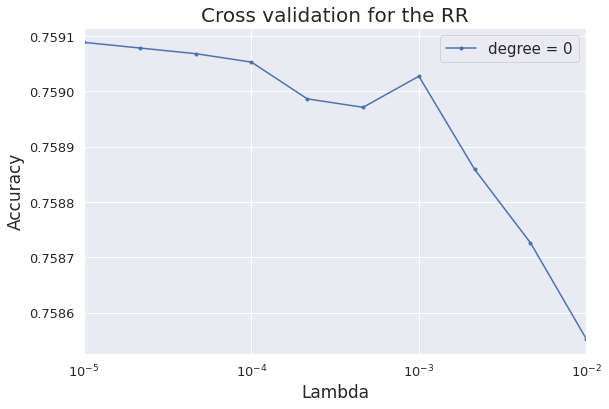

In [15]:
# parameters setting
type_ = 'RR'
bd_left = -5
bd_right = -2
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(1)
# cross validation
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, seed=seed)

**The best lambda = $10^{-5}$**

### Let's now apply best hyper-parameters to the model

In [16]:
lambda_ = 1e-5
y_preds = []
for i in range(4):
    w, loss = ridge_regression(y_trains[i], x_trains[i], lambda_)
    y_pred = predict_labels(w, x_tests[i])
    y_preds.append(y_pred)
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7558


**Best accuracy for Ridge regression without polynomical extension is 0.7558**

### 4.2 Ridge regression with applying polynomical extension

### Cross validation fot the ridge regression

100%|██████████| 10/10 [13:06<00:00, 78.69s/it] 


Accuracy is 0.8250


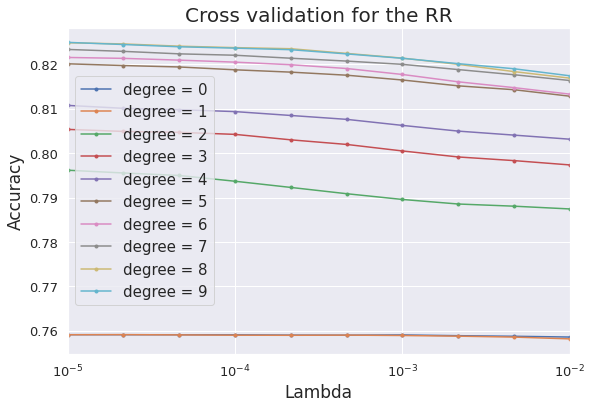

In [11]:
# parameters setting
type_ = 'RR'
bd_left = -5
bd_right = -2
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(0, 10)
# cross validation
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, seed=seed)

**The best lambda = $10^{-5}$, best degree = 8  
We can see that there is no need to increase the degree parameter, because it doesn't bring accuracy improvements**

### Let's now apply best hyper-parameters to the model

In [18]:
lambda_ = 1e-5
y_preds = []
degree = 8
w_rr = []
for i in range(4):
    x_train_poly = build_poly(x_trains[i], degree)
    x_test_poly = build_poly(x_tests[i], degree)
    w, loss = ridge_regression(y_trains[i], x_train_poly, lambda_)
    w_rr.append(w)
    y_pred = predict_labels(w, x_test_poly)
    y_preds.append(y_pred)
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.8231


**Best accuracy for Ridge regression is 0.8231**

## 5. Logistic Regression

### Cross validation for logistic regression

100%|██████████| 5/5 [06:31<00:00, 78.21s/it]


Accuracy is 0.7508


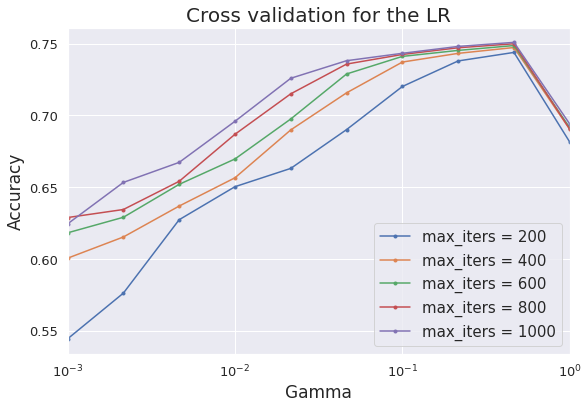

In [19]:
# parameters setting
type_ = 'LR'
bd_left = -3
bd_right = 0
# grid for hyperparameters
# gammas = np.linspace(10**bd_left, 10**bd_right, 10)
gammas = np.logspace(bd_left, bd_right, 10)
max_iters = np.arange(200, 1100, 200)
# cross validation
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**The best gamma = 0.5 and the best max_iter = 1000.  
We can see that there is no need to increase the max_iters parameter, because it doesn't bring accuracy improvements**

### Let's now apply best hyper-parameters to the model

In [20]:
max_iters = 1000
gamma = 0.5
y_preds = []
for i in range(4):
    np.random.seed(seed)
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = logistic_regression(y_trains[i], x_trains[i], initial_w, max_iters, gamma, plot_loss = False)
    y_pred = predict_labels_for_log(w, x_tests[i])
    y_preds.append(y_pred)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.7462


**Best accuracy for Logistic regression is 0.7462**

## 6. Logistic Regression with Regularization

### 6.2 Logistic regression with regularization without applying polynomical extension

### Cross validation for logistic regression with regularizarion

100%|██████████| 1/1 [02:06<00:00, 126.72s/it]


Accuracy is 0.7509


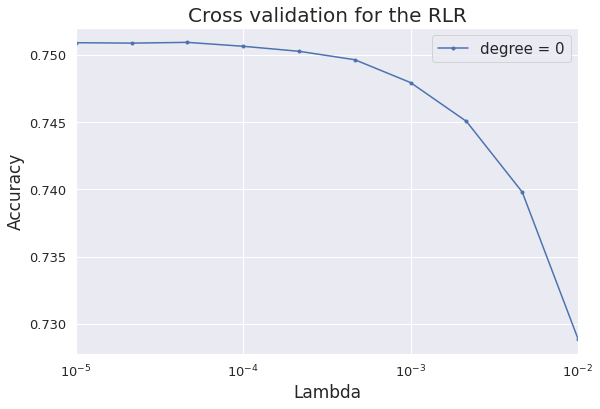

In [21]:
# parameters setting
type_ = 'RLR'
bd_left = -5
bd_right = -2
max_iters = 1000
gammas = 0.5
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(1)
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, max_iters=max_iters, gammas=gammas, seed=seed)

**The best lambda = $10^{-5}$  
Here we used the same best max_iters and gamma as for the logistic regression without reguarization**

### Let's now apply best hyper-parameters to the model

In [10]:
max_iters = 1000
gamma = 0.5
lambda_ = 1e-5
y_preds = []
w_lrr = []
for i in range(4):
    np.random.seed(seed)
    initial_w = np.random.rand((x_trains[i].shape[1]))
    w, loss = reg_logistic_regression(y_trains[i], x_trains[i], lambda_, initial_w, max_iters, gamma, plot_loss = False)
    y_pred = predict_labels_for_log(w, x_tests[i])
    y_preds.append(y_pred)
    w_lrr.append(w)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.74622


**Best accuracy for Logistic regression with regularization without polynomical extension is 0.74622**

### 6.2 Logistic regression with regularization with applying polynomical extension

### Cross validation for logistic regression with regularizarion

 67%|██████▋   | 2/3 [06:45<03:37, 217.05s/it]/home/sofya/ml-project-1-ml_ses_project1/utils.py:153: RuntimeWarning: divide by zero encountered in log
  loss = - 1/y.shape[0]*np.sum((y == 1)*np.log(h) + (y == -1)*np.log(1 - h))
/home/sofya/ml-project-1-ml_ses_project1/utils.py:153: RuntimeWarning: invalid value encountered in multiply
  loss = - 1/y.shape[0]*np.sum((y == 1)*np.log(h) + (y == -1)*np.log(1 - h))
/home/sofya/ml-project-1-ml_ses_project1/utils.py:214: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-tx@w))
100%|██████████| 3/3 [13:28<00:00, 269.48s/it]


Accuracy is 0.7509


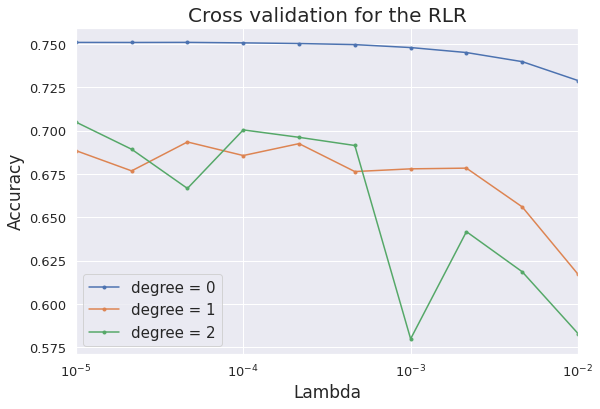

In [9]:
# parameters setting
type_ = 'RLR'
bd_left = -5
bd_right = -2
max_iters = 1000
gammas = 0.5
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(3)
cross_validation_demo(type_=type_, y=y_trains, tx=x_trains, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, max_iters=max_iters, gammas=gammas, seed=seed)

**The best lambda = $10^{-5}$  
Here we can see than increasing degree doesn't improve the accuracy**

### Let's try to use degree = 1

In [11]:
max_iters = 1000
gamma = 0.5
lambda_ = 1e-5
y_preds = []
w_lrr = []
degree = 1
for i in range(4):
    x_train_poly = build_poly(x_trains[i], degree)
    x_test_poly = build_poly(x_tests[i], degree)
    np.random.seed(seed)
    initial_w = np.random.rand((x_train_poly.shape[1]))
    w, loss = reg_logistic_regression(y_trains[i], x_train_poly, lambda_, initial_w, max_iters, gamma, plot_loss = False)
    y_pred = predict_labels_for_log(w, x_test_poly)
    y_preds.append(y_pred)
    w_lrr.append(w)
              
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.68232


**Best accuracy for Logistic regression with regularization with degree = 1 is 0.68232**

# Confusion matrix:

### Computing predictions for the ridge regression with best hyper parameters and degree = 8

In [12]:
lambda_ = 1e-5
y_preds = []
degree = 8
w_rr = []
for i in range(4):
    x_train_poly = build_poly(x_trains[i], degree)
    x_test_poly = build_poly(x_tests[i], degree)
    w, loss = ridge_regression(y_trains[i], x_train_poly, lambda_)
    w_rr.append(w)
    y_pred = predict_labels(w, x_test_poly)
    y_preds.append(y_pred)
print("accuracy :", accuracy(np.array(np.concatenate(y_preds)), y_tests))

accuracy : 0.8231


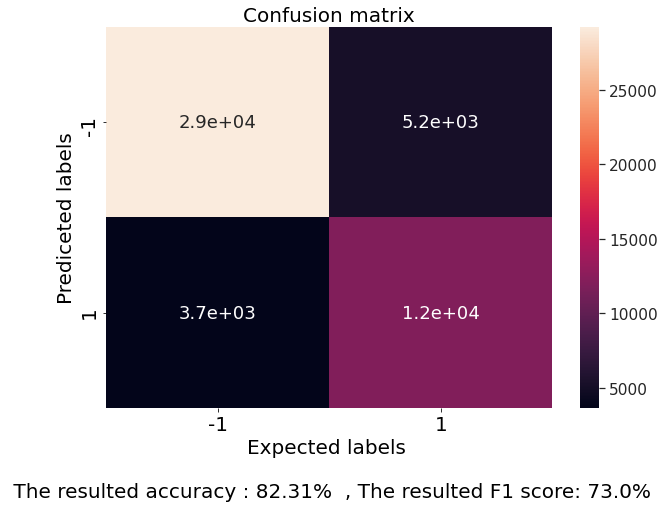

In [13]:
confusion_matrix(y_tests,np.array(np.concatenate(y_preds)))

# Generate predictions and save ouput in csv format for submission:

#### Loading test data for submission

In [3]:
DATA_TEST_PATH = 'data/test.csv'  # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

#### Preprocessing test data

In [15]:
jet_groups_test, jet_idxs = preproccess_test(tX_test, ids_test, del_columns, del_columns_cor, means, stds, mean_of_all_col)

#### Predict labels using ridge regression with degree = 8

In [16]:
y_preds = []
for i in range(4):
    jet_groups_test[i] = build_poly(jet_groups_test[i], degree=8)
    y_pred = predict_labels(w_rr[i], jet_groups_test[i])
    y_preds.append(y_pred)
final_pred = np.array(np.concatenate(y_preds))

#### Creating submission file

In [17]:
OUTPUT_PATH = 'data/pred.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(jet_idxs, final_pred, OUTPUT_PATH)